In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [77]:
sample_count = 10000

# Parameters for 2D Gausian distribution
mean = [0, 0]                       # Mean vector
covariance = [[1, 0], [0, 1]]   # Covariance matrix

# Generate samples
data = np.random.multivariate_normal(mean, covariance, sample_count)

In [78]:
# Apply KMeans algorithm
iterations = 3000
norms = []
for _ in range(iterations):
    # Execute KMeans algorithm
    kmeans = KMeans(n_clusters=3).fit(data)

    # Get cluster centers
    centroids = kmeans.cluster_centers_

    # Calculate norms for each centroid and average of norms (value R)
    norm = np.linalg.norm(centroids, axis=1)
    R = np.mean(norm)
    norms.append(R)


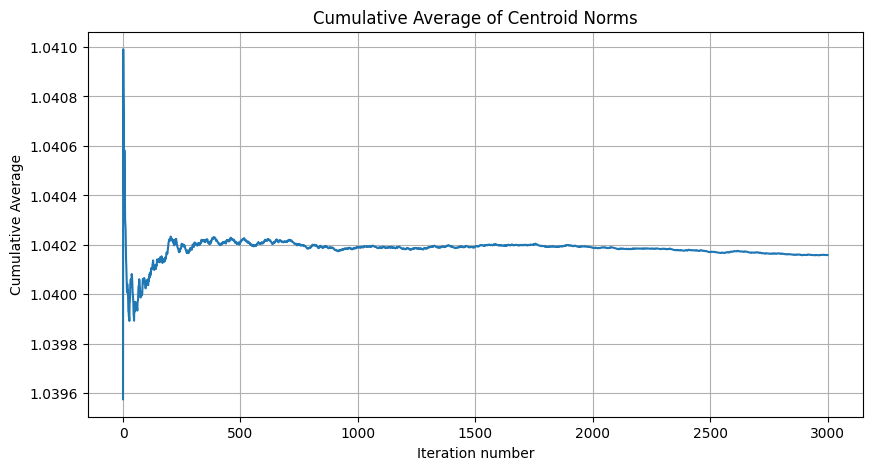

In [79]:
# Calculate cumulative norms
cumulative_average = np.cumsum(norms) / np.arange(1, len(norms) + 1)

# Plot Cumulative average of centroid norms
plt.figure(figsize=(10,5))
plt.title("Cumulative Average of Centroid Norms")
plt.plot(cumulative_average)
plt.xlabel("Iteration number")
plt.ylabel("Cumulative Average")
plt.grid()
plt.show()



# Results
As we can see the cumulative average of centroid norms stabilizes decresses with number of iterations.
After initial stabilization we can see that the value is mostly not changing, however over a long number
of iterations (in our case around 80% of all iterations) it changes by relatively meaningful amount.
Keep in mind that this "relatively meaningful" amount is still smaller than 1e-3 so the decision
of taking this value into consideration depends on application.

In [80]:
# Calculate the number of iterations required to achieve 1e-9 accuracy
target_error = 1e-9
test_iteration = None

for i in range(1, len(cumulative_average)):
    # Calculate the absolute difference
    diff = abs(cumulative_average[i] - cumulative_average[i-1])
    if diff < target_error:
        test_iteration = i
        break

if test_iteration:
    print(f'Number of iterations needed to achieve 9-digit accuracy: {test_iteration}')



Number of iterations needed to achieve 9-digit accuracy: 1012
